## Logistic Regression as a Single Neuron Model

## Imports

In [4]:
import numpy as np
import h5py
import requests
import os
import matplotlib.pyplot as plt

## Helper Functions (Just run this cell - no need to go through the code in helper functions)

In [5]:
def download_file(url, local_filename):
    """
    Downloads a file from a URL and saves it locally.
    """
    if not os.path.exists(local_filename):
        print(f"Downloading {local_filename}...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_filename, 'wb') as f:
                f.write(response.content)
            print(f"File downloaded: {local_filename}")
        else:
            raise Exception(f"Failed to download file from {url}. Status code: {response.status_code}")
    else:
        print(f"File already exists: {local_filename}")

def load_dataset():
    # URLs of the .h5 files
    train_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/train_catvnoncat.h5'
    test_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/test_catvnoncat.h5'

    # Local file paths
    train_file = 'train_catvnoncat.h5'
    test_file = 'test_catvnoncat.h5'

    # Download the files if not already present
    download_file(train_url, train_file)
    download_file(test_url, test_file)

    # Open the files using h5py
    train_dataset = h5py.File(train_file, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Train set labels

    test_dataset = h5py.File(test_file, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # Test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # Test set labels

    classes = np.array(test_dataset["list_classes"][:])  # List of classes

    # Reshape labels
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## Importing Dataset

In [6]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

File downloaded: train_catvnoncat.h5
File downloaded: test_catvnoncat.h5


## Data Visualization

label:  [1]


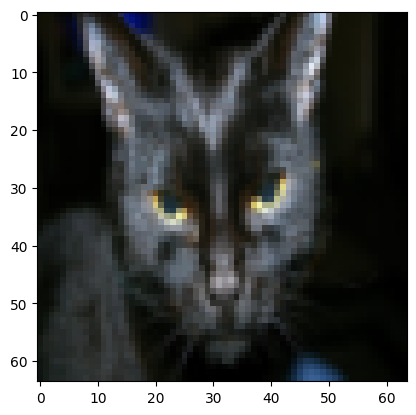

In [7]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

### **Exercise 1:** Take a look at five different images in train/test set. Try to see both cat and non-cat samples.

Train Image 1 Label: [0] (0 = non-cat, 1 = cat)
Train Image 2 Label: [0] (0 = non-cat, 1 = cat)
Train Image 3 Label: [1] (0 = non-cat, 1 = cat)
Train Image 4 Label: [0] (0 = non-cat, 1 = cat)
Train Image 5 Label: [0] (0 = non-cat, 1 = cat)
Test Image 1 Label: [1] (0 = non-cat, 1 = cat)
Test Image 2 Label: [1] (0 = non-cat, 1 = cat)
Test Image 3 Label: [1] (0 = non-cat, 1 = cat)
Test Image 4 Label: [1] (0 = non-cat, 1 = cat)
Test Image 5 Label: [1] (0 = non-cat, 1 = cat)


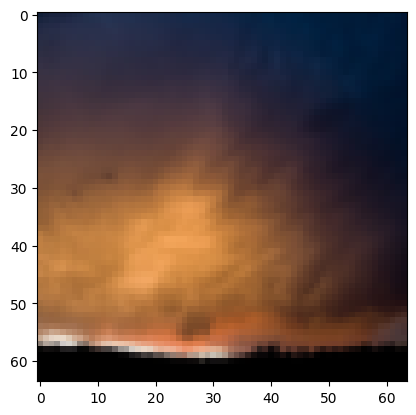

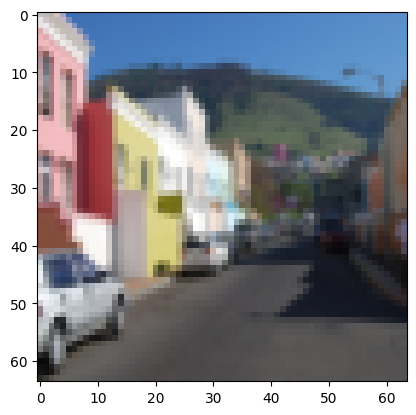

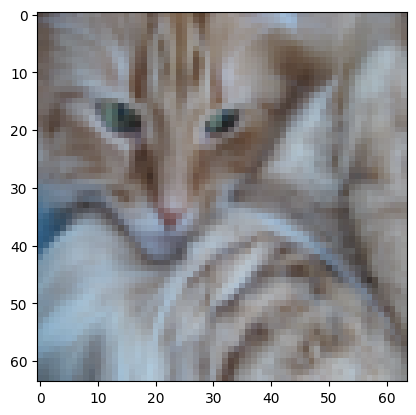

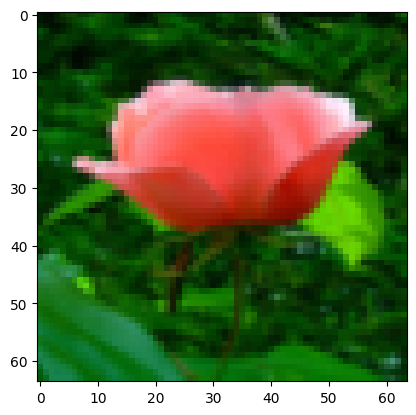

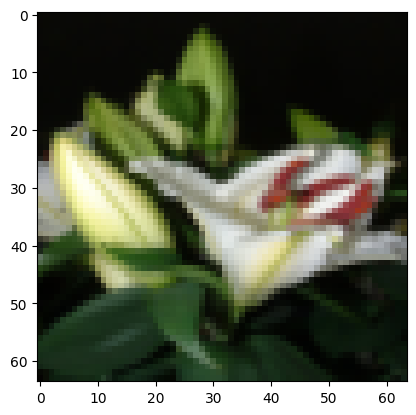

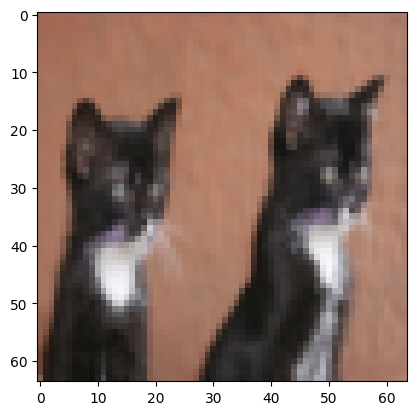

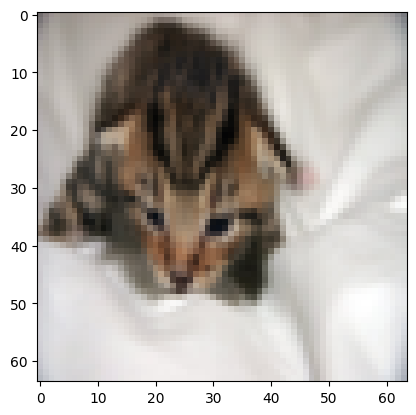

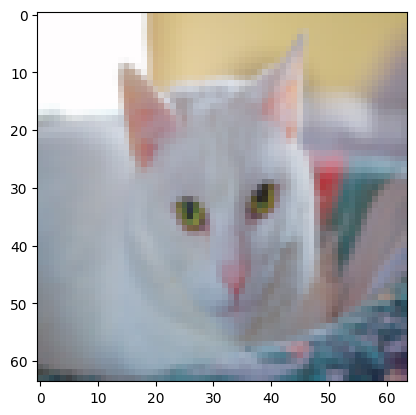

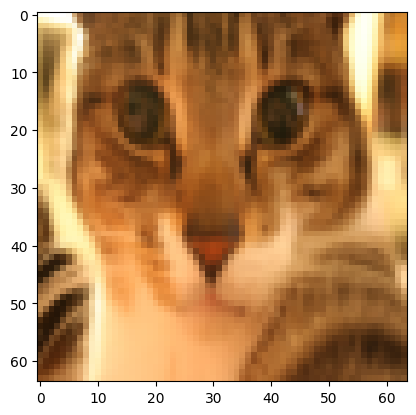

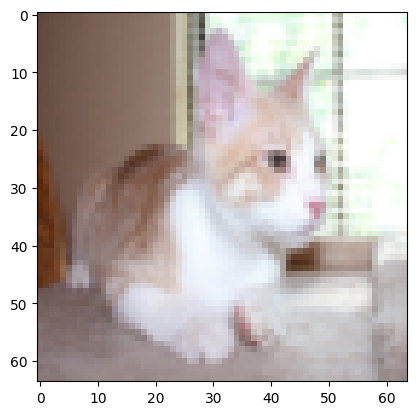

In [8]:
for i in range(5):
    plt.figure()
    plt.imshow(train_set_x_orig[i])
    print(f"Train Image {i + 1} Label: {train_set_y[:, i]} (0 = non-cat, 1 = cat)")

for i in range(5):
    plt.figure()
    plt.imshow(test_set_x_orig[i])
    print(f"Test Image {i + 1} Label: {test_set_y[:, i]} (0 = non-cat, 1 = cat)")


### **Exercise 2:** What percentage of the pictures in `train set` contain cats?

In [10]:
m_train = train_set_y.shape[1]

num_cats = np.sum(train_set_y)

percentage_cats = (num_cats / m_train) * 100
print(f"Percentage of cat pictures in the training set: {percentage_cats:.2f}%")


Percentage of cat pictures in the training set: 34.45%


## Data Pre-processing

### Brief Theory: Numerical

1.   List item
2.   List item

Representation of Images

![preprocessing](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imvectorkiank.png)

### Simple Numerical Example

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imtovec_example.webp)

#### Step 1: Numerical representation of each channel

In [11]:
red_channel = np.array([[255, 123, 135], [44, 12, 15], [56, 87, 90]]) # 2d array: Matrix
green_channel = np.array([[255, 133, 175], [24, 123, 169], [98, 66, 77]])
blue_channel = np.array([[66, 54, 88], [55, 98, 54], [87, 142, 89]])

print("Red Channel")
print(red_channel.shape)
print(red_channel)

print("Green Channel")
print(green_channel.shape)
print(green_channel)

print("Bue Channel")
print(blue_channel.shape)
print(blue_channel)



Red Channel
(3, 3)
[[255 123 135]
 [ 44  12  15]
 [ 56  87  90]]
Green Channel
(3, 3)
[[255 133 175]
 [ 24 123 169]
 [ 98  66  77]]
Bue Channel
(3, 3)
[[ 66  54  88]
 [ 55  98  54]
 [ 87 142  89]]


#### Step 2: Putting the channels together in the form of a tensor

In [12]:
print("channel, height, width")
airplane_image = np.array([red_channel, green_channel, blue_channel])  # 3d array: Tensor
print(airplane_image.shape)
print(airplane_image)

channel, height, width
(3, 3, 3)
[[[255 123 135]
  [ 44  12  15]
  [ 56  87  90]]

 [[255 133 175]
  [ 24 123 169]
  [ 98  66  77]]

 [[ 66  54  88]
  [ 55  98  54]
  [ 87 142  89]]]


#### Step 3: Flatten the tensor into a

*   List item
*   List item

vector

In [13]:
airplane_flatten = airplane_image.flatten()   # 1d array: Vector
print(airplane_flatten.shape)
print(airplane_flatten)

(27,)
[255 123 135  44  12  15  56  87  90 255 133 175  24 123 169  98  66  77
  66  54  88  55  98  54  87 142  89]


### **Exercise 3:** Take one sample form train set again and check the shape of it. Try to interpret the numbers in the `shape`.

**Notes:**
- The images are 64x64 `pixels`.
- There are 3 RGB `channels`.

Shape of the sample image: (64, 64, 3)


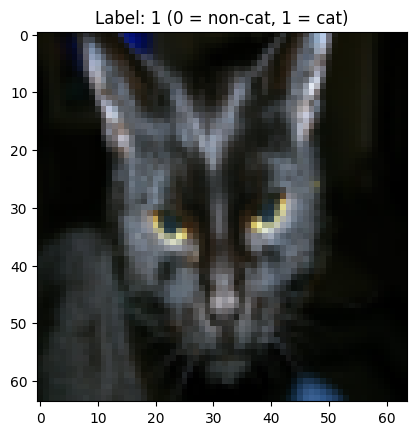

In [14]:
sample_index = 25
sample_image = train_set_x_orig[sample_index]

print(f"Shape of the sample image: {sample_image.shape}")

plt.imshow(sample_image)
plt.title(f"Label: {train_set_y[:, sample_index][0]} (0 = non-cat, 1 = cat)")
plt.show()



### Exercise 4: Fallaten the this sample image? what is the size of the flattened image? why this number?

In [16]:
flattened_image = sample_image.flatten()

print(f"Shape of the flattened image: {flattened_image.shape}")

print(f"Why this number: The flattened image size is {flattened_image.shape[0]} because the original image has a shape of {sample_image.shape}, which means {sample_image.shape[0]} x {sample_image.shape[1]} x {sample_image.shape[2]} = {flattened_image.shape[0]} total pixels.")


Shape of the flattened image: (12288,)
Why this number: The flattened image size is 12288 because the original image has a shape of (64, 64, 3), which means 64 x 64 x 3 = 12288 total pixels.


### Data Preprocessing: Flattening the entrie Train and Test Datasets

In [17]:
train_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
print(train_flat.shape)

test_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
print(test_flat.shape)

train_label = train_set_y[0]
print(train_label.shape)

test_label = test_set_y[0]
print(test_label.shape)



(209, 12288)
(50, 12288)
(209,)
(50,)


**Important Notes:**
- We have 209 samples in the train set, and
- 50 samples in the test set.
- each sample has 64x64x3=12288 `features`. So each pixel can be considered as one feature.
- remember that we had `4` features in `IRIS` dataset and now we have more than `10,000` features.

## Implementing Logistic Regression

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/LogReg_kiank.png)

### **Exercise 5:** Train a `LogisticRegression` classifier to run a binary classification on the flattened cat pictures.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:

train_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
test_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)

train_flat = train_flat / 255.0
test_flat = test_flat / 255.0

log_reg = LogisticRegression()

log_reg.fit(train_flat, train_set_y[0])

test_predictions = log_reg.predict(test_flat)

accuracy = accuracy_score(test_set_y[0], test_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 70.00%


### **Exercise 6:** Evaluate your model manually

1. Choose a random index of an image.
2. Display the image.
3. Print the original label.
4. Print the predicted label.
5. Repeat this process multiple times to identify which pictures are more challenging for the model.

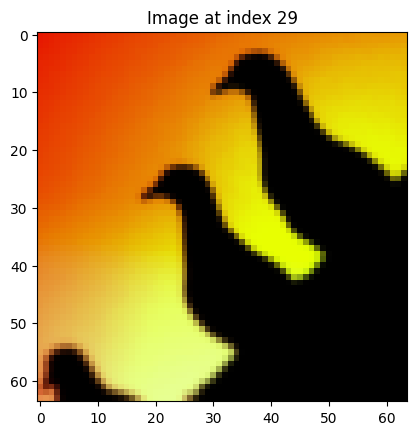

Original Label: 0 (0 = non-cat, 1 = cat)
Predicted Label: 1 (0 = non-cat, 1 = cat)


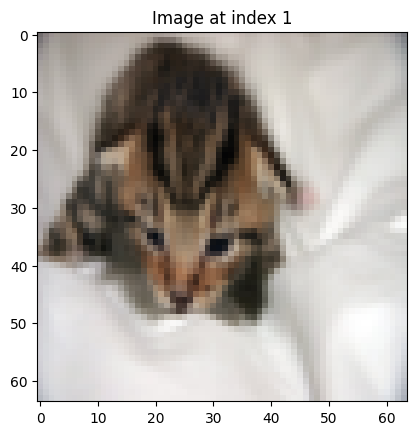

Original Label: 1 (0 = non-cat, 1 = cat)
Predicted Label: 1 (0 = non-cat, 1 = cat)


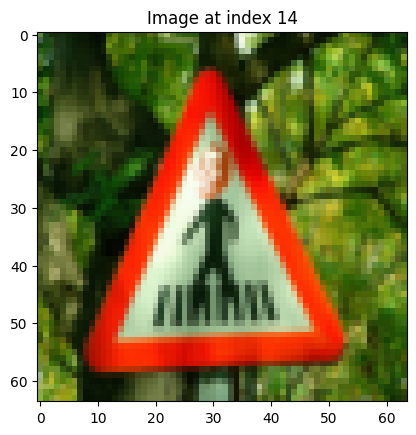

Original Label: 0 (0 = non-cat, 1 = cat)
Predicted Label: 0 (0 = non-cat, 1 = cat)


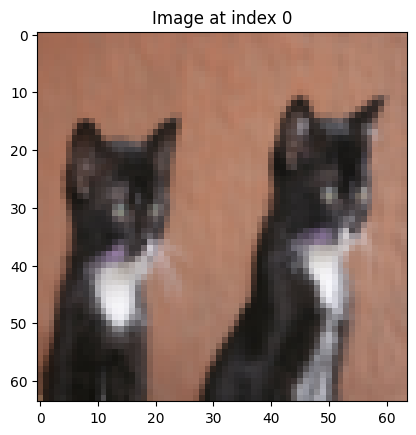

Original Label: 1 (0 = non-cat, 1 = cat)
Predicted Label: 1 (0 = non-cat, 1 = cat)


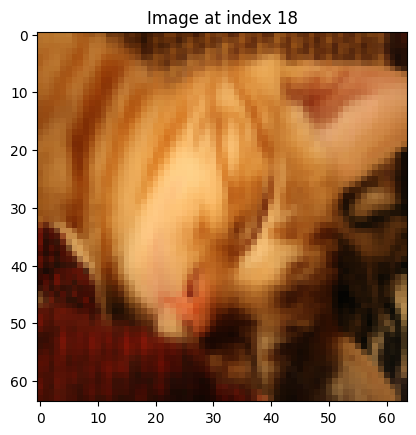

Original Label: 1 (0 = non-cat, 1 = cat)
Predicted Label: 0 (0 = non-cat, 1 = cat)


In [20]:
import random
import matplotlib.pyplot as plt

def evaluate_random_image():
    random_index = random.randint(0, test_flat.shape[0] - 1)

    image = test_set_x_orig[random_index]
    plt.imshow(image)
    plt.title(f"Image at index {random_index}")
    plt.show()

    original_label = test_set_y[0, random_index]
    print(f"Original Label: {original_label} (0 = non-cat, 1 = cat)")

    predicted_label = log_reg.predict(test_flat[random_index].reshape(1, -1))[0]
    print(f"Predicted Label: {predicted_label} (0 = non-cat, 1 = cat)")

for _ in range(5):
    evaluate_random_image()




```
# This is formatted as code
```

### **Exercise 7:** Report the overall accuracy of your classifier.

In [21]:
test_predictions = log_reg.predict(test_flat)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_set_y[0], test_predictions)

print(f"Overall Accuracy of the Classifier: {accuracy * 100:.2f}%")


Overall Accuracy of the Classifier: 70.00%


## MNIST dataset (Optional)- Do exercise 8-10 if you have extra time to practise

In [22]:
#import mnist dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
x_train.shape

(60000, 28, 28)

Label:  4
Image Shape:  (28, 28)


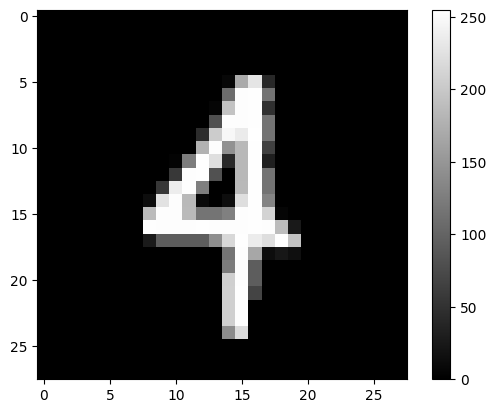

In [24]:
index = np.random.randint(0, x_train.shape[0])
print("Label: ", y_train[index])
print("Image Shape: ", x_train[index].shape)
plt.imshow(x_train[index], cmap='gray')
plt.colorbar()

### **Excercise 8:** What is the difference between a black-and-white image and a color image in terms of numerical representation?

### Hint: check the number of channels in the two types of images.

Black-and-White (Grayscale) Images:

Grayscale images are represented using a single channel.
Each pixel value represents the intensity of light, typically ranging from 0 (black) to 255 (white) in 8-bit representation.
Example shape: (height, width) (e.g., (28, 28) for MNIST).





Color Images:

Color images are represented using three channels: Red, Green, and Blue (RGB).
Each pixel has three values, one for each channel, representing the intensity of the corresponding color.
Example shape: (height, width, 3) (e.g., (64, 64, 3) for 64x64 RGB images).


### **Exercise 9:** Select one data sample and flatten it. What is the size of the flattened image and why?

In [25]:
sample_index = np.random.randint(0, x_train.shape[0])
sample_image = x_train[sample_index]

flattened_image = sample_image.flatten()

print(f"Original Image Shape: {sample_image.shape}")
print(f"Flattened Image Shape: {flattened_image.shape}")

print(f"Why this size: The original image has a shape of {sample_image.shape}, so "
      f"the flattened image has {flattened_image.shape[0]} elements, which is the product of "
      f"height ({sample_image.shape[0]}) and width ({sample_image.shape[1]}).")


Original Image Shape: (28, 28)
Flattened Image Shape: (784,)
Why this size: The original image has a shape of (28, 28), so the flattened image has 784 elements, which is the product of height (28) and width (28).


### **Excercise 10:** Flatten the Entire Train and Test Datasets and implement a logistic regression model on MNIST dataset. What is the accuracy of your model?

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

log_reg.fit(x_train_flat, y_train)

y_pred = log_reg.predict(x_test_flat)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Logistic Regression on MNIST dataset: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Logistic Regression on MNIST dataset: 92.58%


**Some food for thought:** What would the architecture of my model be if I used more than one neuron to predict the label?